# Study Darks scaling with exposure

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [2]:
import libMonocamBaseImages as monoc

In [3]:
NB_OF_CHAN_AMPL=16    # 16 images in each of the fits file

In [4]:
imstats = lambda dat: (dat.min(), dat.max(), dat.mean(), dat.std())

In [5]:
#required_darkexposures=np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,20.,30.,40.,50.,60.,70.,80.,90.,100.,120.,150.,200.,240.])
#required_darkexposures=np.array([1.,5.,10.,50.,100.,150.,200.,240.])
required_darkexposures=np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,50.])
NB_EXPOSURES=required_darkexposures.shape[0]

In [6]:
list_of_darks_filename = [ 'masterdarkscaled_ostrim_exposure{:d}sec.fits'.format(int(expo)) for expo in required_darkexposures ]

In [7]:
list_of_all_darks_ccd = []
for chan in range(1,NB_OF_CHAN_AMPL+1,1):
    list_of_darks_ccd = []
    for image_file in list_of_darks_filename:
        ccd_chan =  ccdproc.CCDData.read(image_file, hdu=chan,unit="adu")
        list_of_darks_ccd.append(ccd_chan)
    
    list_of_all_darks_ccd.append(list_of_darks_ccd)

In [8]:
len(list_of_all_darks_ccd[15] )

11

In [9]:
the_dark_mean = np.zeros([NB_OF_CHAN_AMPL,NB_EXPOSURES])
for chan in np.arange(NB_OF_CHAN_AMPL):
    for idexpo,expo in enumerate(required_darkexposures):
        the_dark_mean[chan,idexpo] = list_of_all_darks_ccd[chan][idexpo].data.flatten().mean()

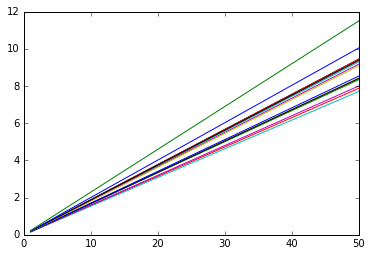

In [10]:
for chan in np.arange(NB_OF_CHAN_AMPL):
    plt.plot(required_darkexposures,the_dark_mean[chan,:])